# Outreachy Task Round

In [1]:
#import libraries
import pandas as pd  
import numpy as np
import numpy as np
import scipy
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy.stats import skew
from scipy.stats import boxcox
import warnings; warnings.simplefilter('ignore')
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, TheilSenRegressor
import category_encoders as ce
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import xgboost as xgb
import lightgbm as lgb

In [19]:
#loading the dataset
df=pd.read_csv('dataset.csv')
df.drop(['Id'], axis=1,inplace=True)

### Data understanding and pre-processing

Here are some of the observations made using the dataset and data_description.txt:
- Dataset consists of categorical, ordinal, and continous data
- Some of the categorical data can be converted to ordinal
- MSSubClass, MoSold is more like a categorical data than continous/ordinal based on the description
- Some columns have mostly one type of value or are mostly nan.
- Some columns have lesser number of null values. This columns should not be discarded and missing values should be imputed with appropriate values in these columns.

Let's handle each of these one by one 


In [322]:
#summary of all columns with numerical value
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [328]:
#summary of all columns with str data type
df.describe(include=[np.object])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

#### 1. Columns with mostly one type of value or mostly nan values


There are multiple columns which have only one type of value. This can be shown by plotting the max frequency(frequency of the mode in the column) vs columns. We can observe that many of such columns have frequency more than 1400 which is close to total number of rows (i.e)1460. Hence these columns have mostly one type of value. Such columns wouldn't be a very useful predictor and they can be dropped to reduce the dimension of feature space.

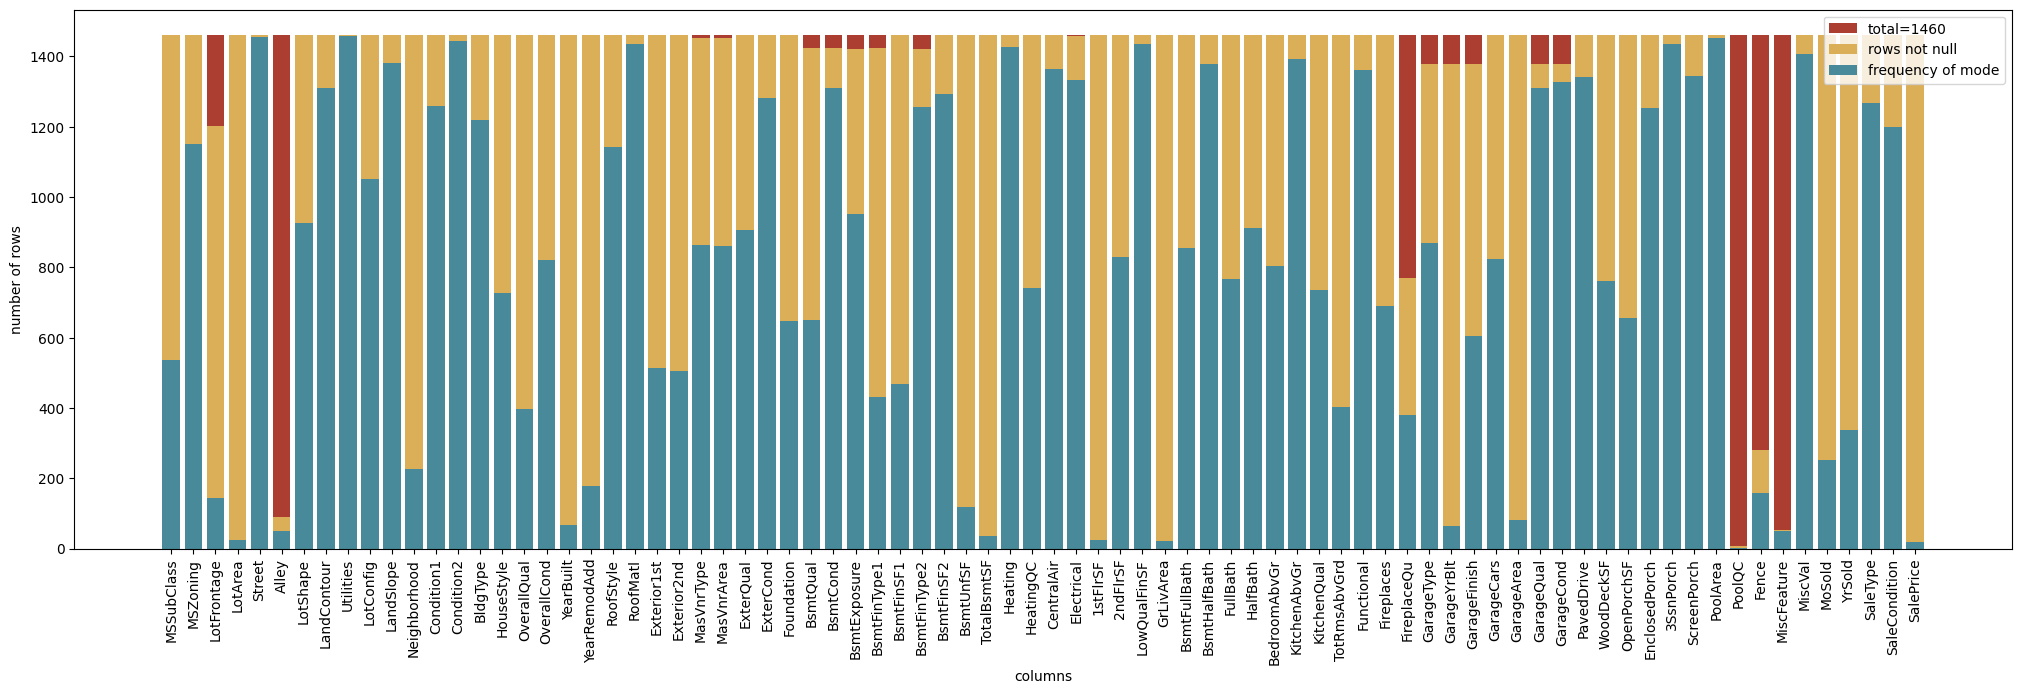

In [324]:
#plotting max value counts and number of non null rows for each feature
total_rows=len(df)
max_value_counts=[]
not_null_counts=[]
for col in df.columns:    
    max_value_counts.append(max(df[col].value_counts()))
    not_null_counts.append(df[col].count())
plt.style.use('default')
plt.figure(figsize=(25,7))
plt.xlabel('columns')
plt.ylabel('number of rows')
plt.xticks(rotation=90)
plt.bar(df.columns, [total_rows for col in df.columns],  color='#ac3e31', label='total=1460')
plt.bar(df.columns, not_null_counts,  color='#dbae58', label='rows not null')
plt.bar(df.columns, max_value_counts,  color='#488a99',label='frequency of mode')
plt.legend(['total=1460','rows not null','frequency of mode'])

plt.show()

Based on above plot, we can see that 
- Columns like **Street**, **Utilities**, **PoolArea**, etc have mostly one type of value. 
- Columns like **Alley**, **PoolQC**, **MiscFeature** etc are mostly null, so these columns can be dropped.
- Columns like **LotFrontage**, **MasVnrType**, **BsmtCond** etc have few null rows, these missing values will be treated subsequently.
- **Fireplaces** has almost half of the rows null.  

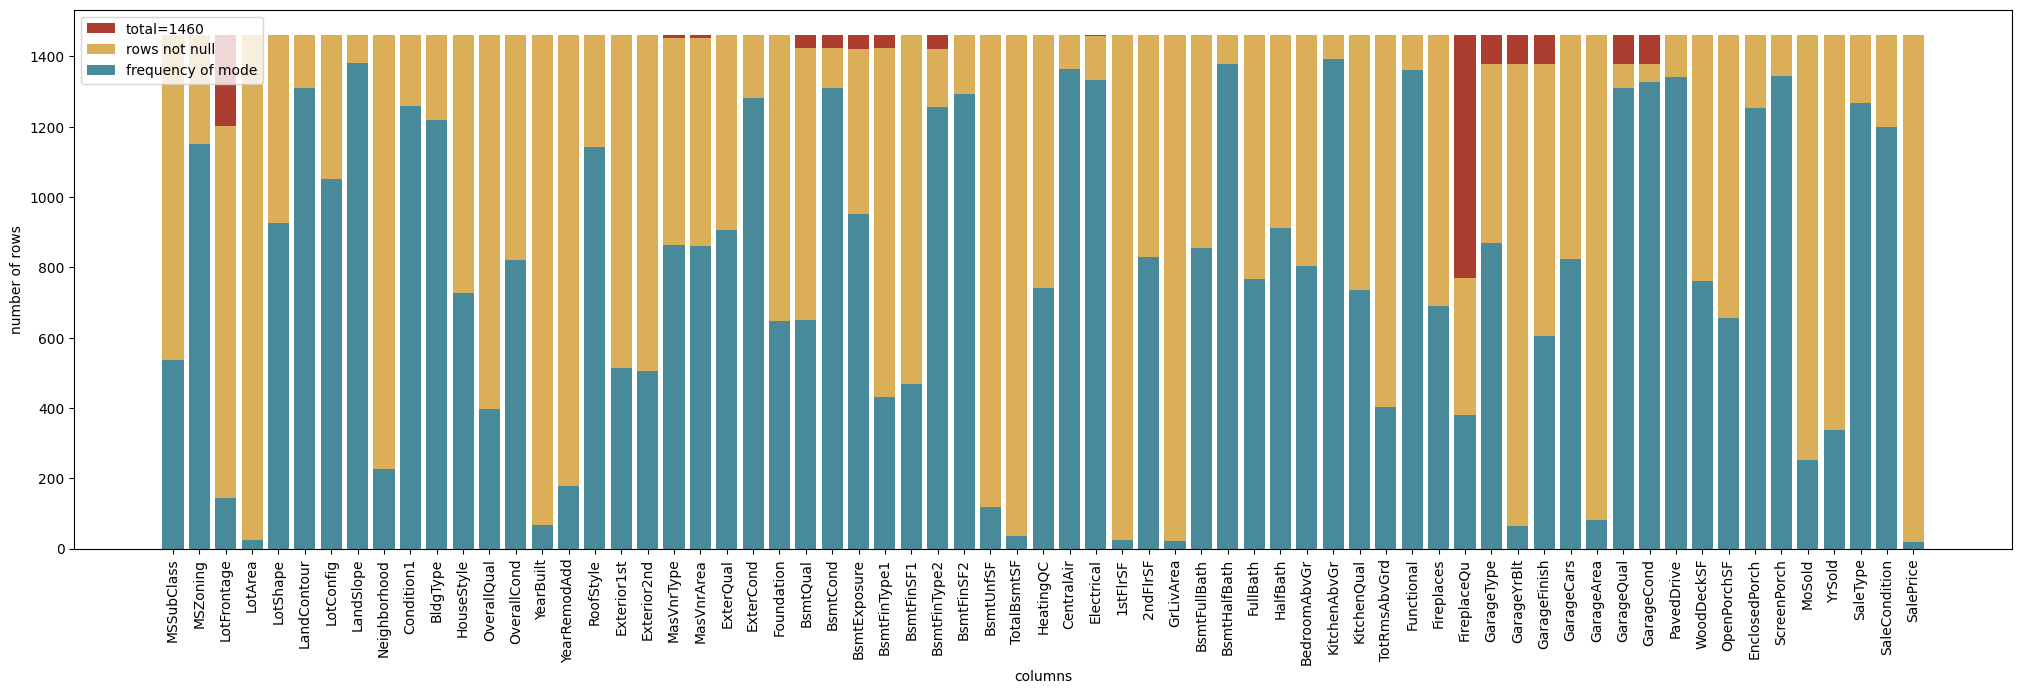

In [325]:
#dropping columns with frequency of mode>1400 and columns with number of null rows >1000
clear_df=df.drop(df.columns[df.apply(lambda col: max(col.value_counts()) > 1400 or col.isnull().sum() > 1000) ], axis=1)

#plotting max value counts and number of non null rows for each feature after dropping columns
total_rows=len(clear_df)
max_value_counts=[]
not_null_counts=[]
for col in clear_df.columns:    
    max_value_counts.append(max(clear_df[col].value_counts()))
    not_null_counts.append(clear_df[col].count())
plt.style.use('default')
plt.figure(figsize=(25,7))
plt.xlabel('columns')
plt.ylabel('number of rows')
plt.xticks(rotation=90)
plt.bar(clear_df.columns, [total_rows for col in clear_df.columns],  color='#ac3e31', label='total=1460')
plt.bar(clear_df.columns, not_null_counts,  color='#dbae58', label='rows not null')
plt.bar(clear_df.columns, max_value_counts,  color='#488a99',label='frequency of mode')
plt.legend(['total=1460','rows not null','frequency of mode'])

plt.show()

#### 2. Handling Missing Values

In [326]:
nan_cols = [col for col in clear_df.columns if clear_df[col].isnull().any()]
print("Columns containing nan values:")
print(", ".join(nan_cols))

Columns containing nan values:
LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond


- **LotFrontage**: Based on the assumption that every propery do have some space between the road and house, the missing values in Lot Frontage could be imputed with median or mean values which would also help in maintaining a normal distribution. An issue while doing the imputation based on median is that, there could be a chance of information leakage which would lead to unreliable prediction. Pipeline would be used while training to avoid the above error.(Pipeline would allow train and test data to process seperately)  
- **MasVnrType**, **MasVnrArea**, **Electrical** could be imputed with the mode or median/mean. Here, I would prefer a simple way to fill missing values since number of missing values are very less.
- For the columns related to basement (i.e) **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2**, and for columns related to garage (i.e) **GarageType**, **GarageFinish**, **GarageQual**, **GarageCond** based on the dataset description, it seems like house doesn't have a basement/garage. Here another category called "VNA" could be introduced.(VNA->Value Not Available)
- Above argument would also hold for **FireplaceQu**, where 'VNA' could be treated as a different category altogether.
- **GarageYrBlt** could be replaced by it's corresponding value in 'YearBuilt' column. Replacing with 0 could result in skewness.

In [329]:
#Filling missing values with median
col1=['LotFrontage','MasVnrArea']
for col in col1:
    clear_df[col].fillna(clear_df[col].median(), inplace=True)
    
#Filling missing values with 'VNA' since the mode value was found to None
col2=['MasVnrType',  'Electrical']
for col in col2:
    clear_df[col].fillna('VNA', inplace=True)
    
#Fill missing values with new category "VNA"
col3=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu']
for col in col3:
    clear_df[col].fillna('VNA', inplace=True)
    
#Replacing Na values in GarageYrBlt with corresponding values in YearBuilt
clear_df.loc[(pd.isnull(clear_df.GarageYrBlt)), 'GarageYrBlt'] = df.YearBuilt


#### 3. Classifying columns into categorical, ordinal, numerical based on understanding of dataset

Based on the data description, 
- Certain categorical columns can be converted to ordinal for example ExterQual, ExterCond, BsmtQual, BsmtCond etc, as the categories sound more like a rating.
- It is better to treat **MSSubClass** and **MoSold** as categorical, rather than continous/ordinal. 
- Here, I would also seperate ordinal and continous columns based on number of distinct values they have.

In [330]:
#treating certain categorical columns as ordinal
encoder={}

encoder['LotShape']={'Reg':0,'IR1':1,'IR2':2,'IR3':3}
encoder['LandSlope']={'Gtl':1, 'Mod':2, 'Sev':3}
encoder['GarageFinish']={'Fin':3, 'RFn':2, 'Unf':1, 'VNA':0}
encoder['BsmtExposure']={'Gd':4,'Av':3,'Mn':2,'No':1,'VNA':0}
encoder['Functional']={'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7}
encoder['PavedDrive']={'Y':2,'P':1,'N':0}

#columns with values as Ex,Gd,TA,Fa,Po,VNA can be treated as ordinal
ratings={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'VNA':0}
rated_cols=['ExterQual', 'ExterCond','BsmtQual','BsmtCond','KitchenQual','FireplaceQu','GarageQual', 'GarageCond']
for col in rated_cols:
    encoder[col]=ratings
    

categorical_encoded=encoder.keys()

#encoding categorical columns to ordinal 
for col in categorical_encoded:
    clear_df[col]=clear_df[col].apply(lambda val: encoder[col][val])



In [331]:
#classification of data

#categorical columns
categorical=list(clear_df.select_dtypes(include ='object').columns)
# adding MSSubClass and MoSold to categorical
categorical.extend(['MSSubClass','MoSold'])
print("Categorical columns are:")
print(categorical)
print("---------------------------------------------")

#splitting columns into numerical and ordinal
ordinal=[]
numerical=[]
number=set(clear_df.select_dtypes(include = np.number).columns)-{'MSSubClass','MoSold','SalePrice'}
for col in number:
    #classifying the columns based on number of distinct values
    if clear_df[col].nunique()>10:
        numerical.append(col)
    else:
        ordinal.append(col)
        
print("Numerical columns are:")
print(numerical)
print("---------------------------------------------")
print("Ordinal columns are:")
print(ordinal)
print("---------------------------------------------")
target=['SalePrice']
print("Target column is:")
print(target)


Categorical columns are:
['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold']
---------------------------------------------
Numerical columns are:
['EnclosedPorch', 'LotFrontage', 'ScreenPorch', 'MasVnrArea', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFinSF2', 'YearBuilt', 'TotRmsAbvGrd', 'OpenPorchSF', 'GrLivArea', '1stFlrSF', 'BsmtUnfSF', 'BsmtFinSF1', 'LotArea', 'GarageYrBlt', 'WoodDeckSF', 'YearRemodAdd', 'GarageArea']
---------------------------------------------
Ordinal columns are:
['GarageCars', 'LotShape', 'OverallQual', 'GarageCond', 'BsmtExposure', 'Functional', 'Fireplaces', 'GarageFinish', 'BsmtCond', 'LandSlope', 'BsmtFullBath', 'ExterQual', 'BsmtHalfBath', 'ExterCond', 'GarageQual', 'BedroomAbvGr', 'KitchenQual', 'FullBath', 'Paved

### Feature Engineering

#### 1. Transforming data and handling Outliers
- Correlation coefficients like pearson coefficient and one-way ANOVA would require data(numerical) to be normally distributed.
- Better prediction could be made on normally distributed data. 
- Also above correlation tests are vey sensitive to outliers.

Hence it is necessary to check if data is normally distributed or not and then remove outliers.

##### Checking if target variable is normally distributed or not

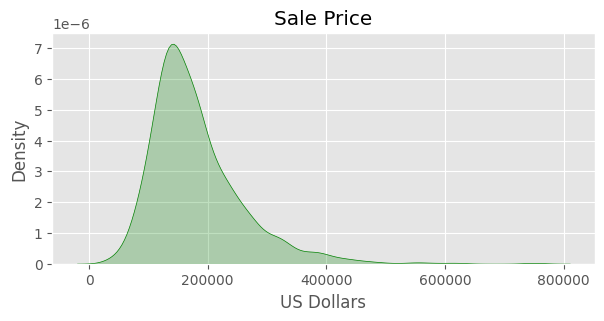

In [332]:
#plotting kdeplot for sale price
plt.style.use("ggplot")
plt.figure(figsize=(7,3))
sns.kdeplot(clear_df['SalePrice'], color='g', shade=True)
plt.title('Sale Price')
plt.xlabel('US Dollars')
plt.ylabel('Density')
plt.show()

In [333]:
#checking skewness
print( 'Skewness of sale price : ', skew(clear_df['SalePrice']))

Skewness of sale price :  1.880940746034036


From above plot and skewness result we can that the data is highly (positive) skewed. In order to remove skewness let's try out various transformations.

**Log Transformation**

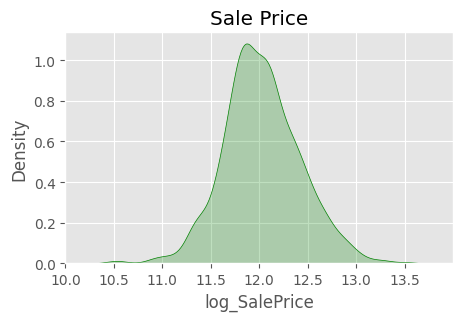

In [334]:
clear_df['log_SalePrice']=np.log(clear_df['SalePrice'])
#plotting kdeplot for sale price
plt.figure(figsize=(5,3))
sns.kdeplot(clear_df['log_SalePrice'], color='g', shade=True)
plt.title('Sale Price')
plt.ylabel('Density')
plt.show()

In [335]:
#checking skewness
print( 'Skewness of sale price : ', skew(clear_df['log_SalePrice']))


Skewness of sale price :  0.1212103673013655


After log transformation skewness of the data is considerably reduced

**Square Root Transformation**

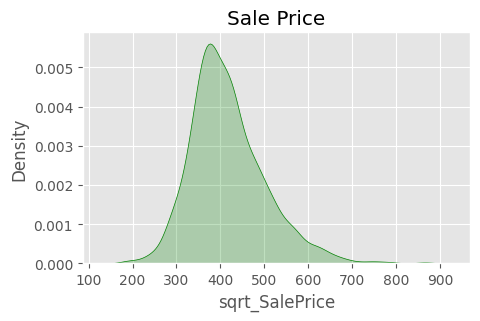

In [336]:
clear_df['sqrt_SalePrice']=np.sqrt(clear_df['SalePrice'])
#plotting kdeplot for sale price
plt.figure(figsize=(5,3))
sns.kdeplot(clear_df['sqrt_SalePrice'], color='g', shade=True)
plt.title('Sale Price')
plt.ylabel('Density')
plt.show()

In [337]:
#checking skewness
print( 'Skewness of sale price : ', skew(clear_df['sqrt_SalePrice']))


Skewness of sale price :  0.9421834681211159


Square root transformation didn't lead to a considerable improvement.

**Box cox Transformation**

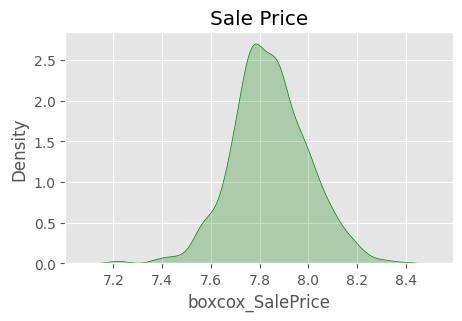

In [338]:
clear_df['boxcox_SalePrice']=boxcox(clear_df['SalePrice'])[0]
#plotting kdeplot for sale price
plt.figure(figsize=(5,3))
sns.kdeplot(clear_df['boxcox_SalePrice'], color='g', shade=True)
plt.title('Sale Price')
plt.ylabel('Density')
plt.show()

In [339]:
#checking skewness
print( 'Skewness of sale price : ', skew(clear_df['boxcox_SalePrice']))




Skewness of sale price :  -0.008644001143304141


Among all the transformations, box cox gave skewness closest to 0.

In [340]:
#Since box cox transformations gave best results, let's drop other 2
clear_df=clear_df.drop(['sqrt_SalePrice'],axis=1)
clear_df=clear_df.drop(['log_SalePrice'],axis=1)

##### removing outliers for target variable

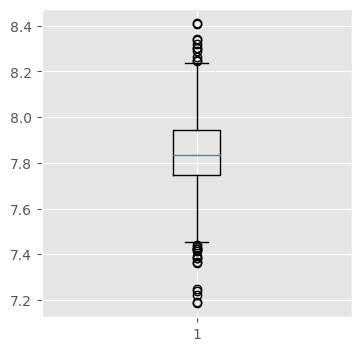

In [341]:
#plotting box plot for SalePrice
plt.figure(figsize=(4,4))
plt.boxplot(clear_df['boxcox_SalePrice'])
plt.show()

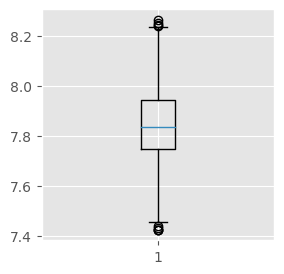

In [342]:
# calculate summary statistics
data_mean, data_std = np.mean(clear_df['boxcox_SalePrice']), np.std(clear_df['boxcox_SalePrice'])
# identify outliers
cut_off = data_std * 2.67
lower, upper = data_mean - cut_off, data_mean + cut_off

cleaned_df=clear_df.loc[[lower<=x<=upper for x in clear_df['boxcox_SalePrice']]]

#plotting box plot for SalePrice
plt.figure(figsize=(3,3))
plt.boxplot(cleaned_df['boxcox_SalePrice'])
plt.show()

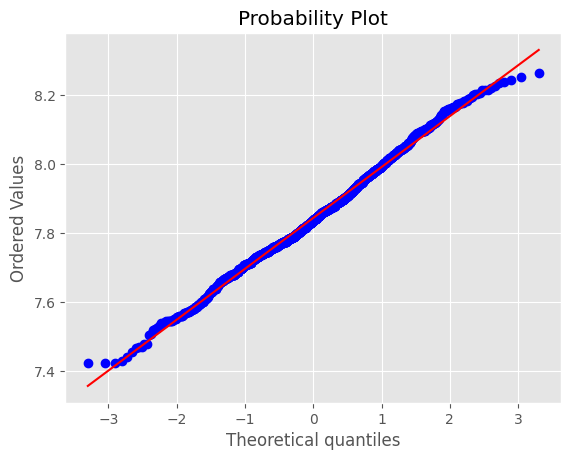

<Figure size 100x100 with 0 Axes>

In [343]:
#plotting the probability plot
res = stats.probplot(cleaned_df['boxcox_SalePrice'], plot=plt)
plt.figure(figsize=(1,1))
plt.show()

Now the target variable is almost normally distributed

##### Unskewing the data

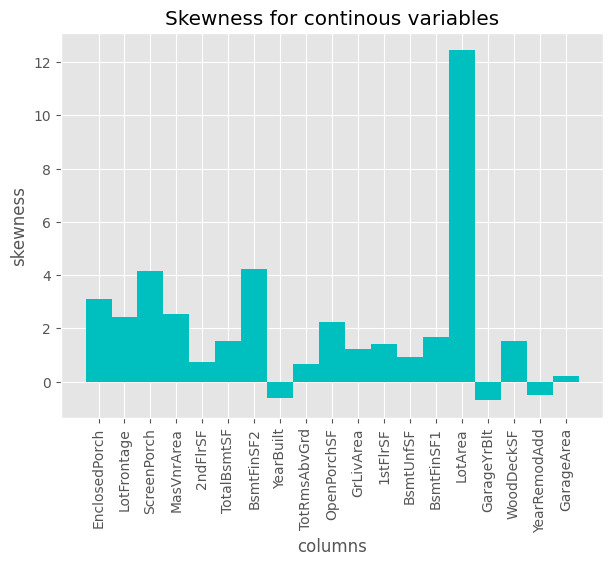

In [344]:
#check for skewness for each numerical variable
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title("Skewness for continous variables")
plt.xlabel("columns")
plt.ylabel("skewness")
plt.bar(numerical, [skew(cleaned_df[col]) for col in numerical], width=1.0, color='c')
plt.show()

- Based on above plot we can see that **LotArea** has very high skewness, (accepted value of skewness is -1 to 1)
- For data with very high skewness (i.e) skewness>2 boxcox transformation can be used
- For data with moderate skewness (i.e) 0 < skewness < 1, sqrt transformation can be used.
- For data with negative skewness, square transformation can be used.

In [345]:
#remove skewness

def unskew(col):
    if 1<skew(cleaned_df[col])<=2:
        cleaned_df["sqrt_"+col]=np.sqrt(cleaned_df[col])
        return "sqrt_"+col
    elif skew(cleaned_df[col])>2:
        cleaned_df['boxcox_'+col]=boxcox(cleaned_df[col]+0.000001)[0]
        return 'boxcox_'+col
    elif skew(cleaned_df[col])<-1:
        cleaned_df['square_'+col]=cleaned_df[col]**2
        return 'square_'+col
    else:
        return col
        
    
        
        
unskew_numerical=[]
for col in numerical:
    unskew_numerical.append(unskew(col))
       

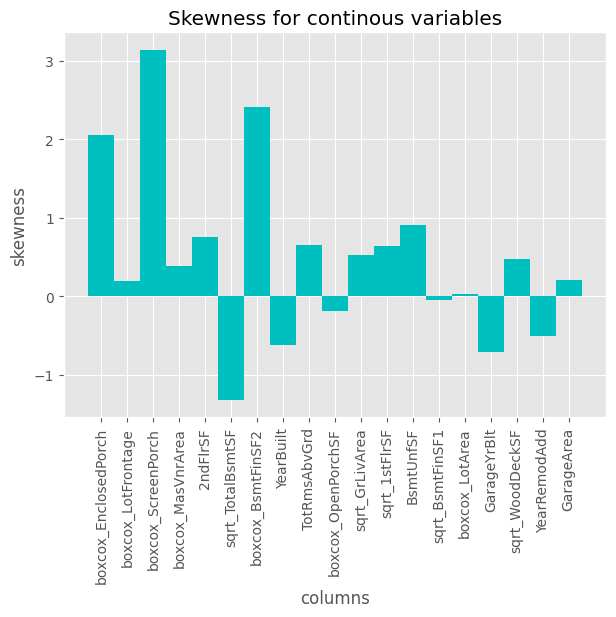

In [346]:
#check for skewness for each numerical variable
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title("Skewness for continous variables")
plt.xlabel("columns")
plt.ylabel("skewness")
plt.bar(unskew_numerical, [skew(cleaned_df[col]) for col in unskew_numerical], width=1.0, color='c')
plt.show()

- Skewness of EnclosedPorch and ScreenPorch couldn't be reduced even after transformation since most of the values in these columns is 0, we can drop these columns from analysis
- BsmtFinSF2 also has most of the values 0, apart from that we can see TotalBsmtSF=BsmtFinSF2+BsmtFinSF1+BsmtUnfSF, hence we can drop BsmtFinSF2 from our analysis.
- Since TotalBsmtSF is a little less than -1, we can consider it.

In [347]:
unskew_numerical.remove('boxcox_BsmtFinSF2')
unskew_numerical.remove('boxcox_EnclosedPorch')
unskew_numerical.remove('boxcox_ScreenPorch')

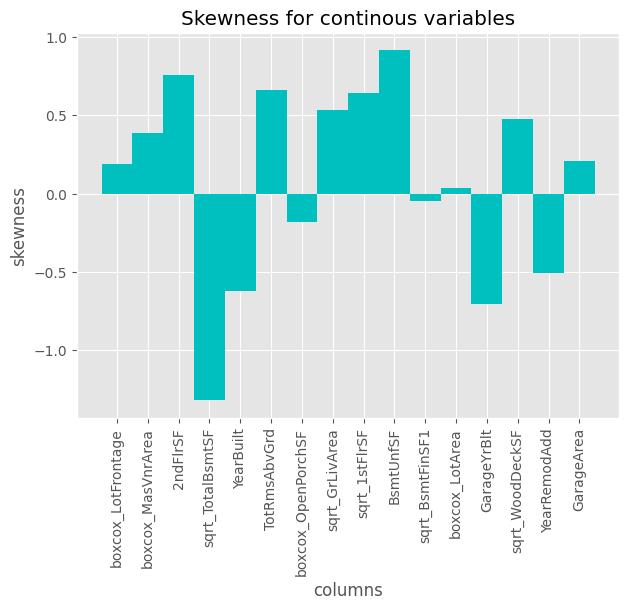

In [348]:
#check for skewness for each numerical variable
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title("Skewness for continous variables")
plt.xlabel("columns")
plt.ylabel("skewness")
plt.bar(unskew_numerical, [skew(cleaned_df[col]) for col in unskew_numerical], width=1.0, color='c')
plt.show()

#### 2. Correlation Tests

**Pairplot to vizualize the data**


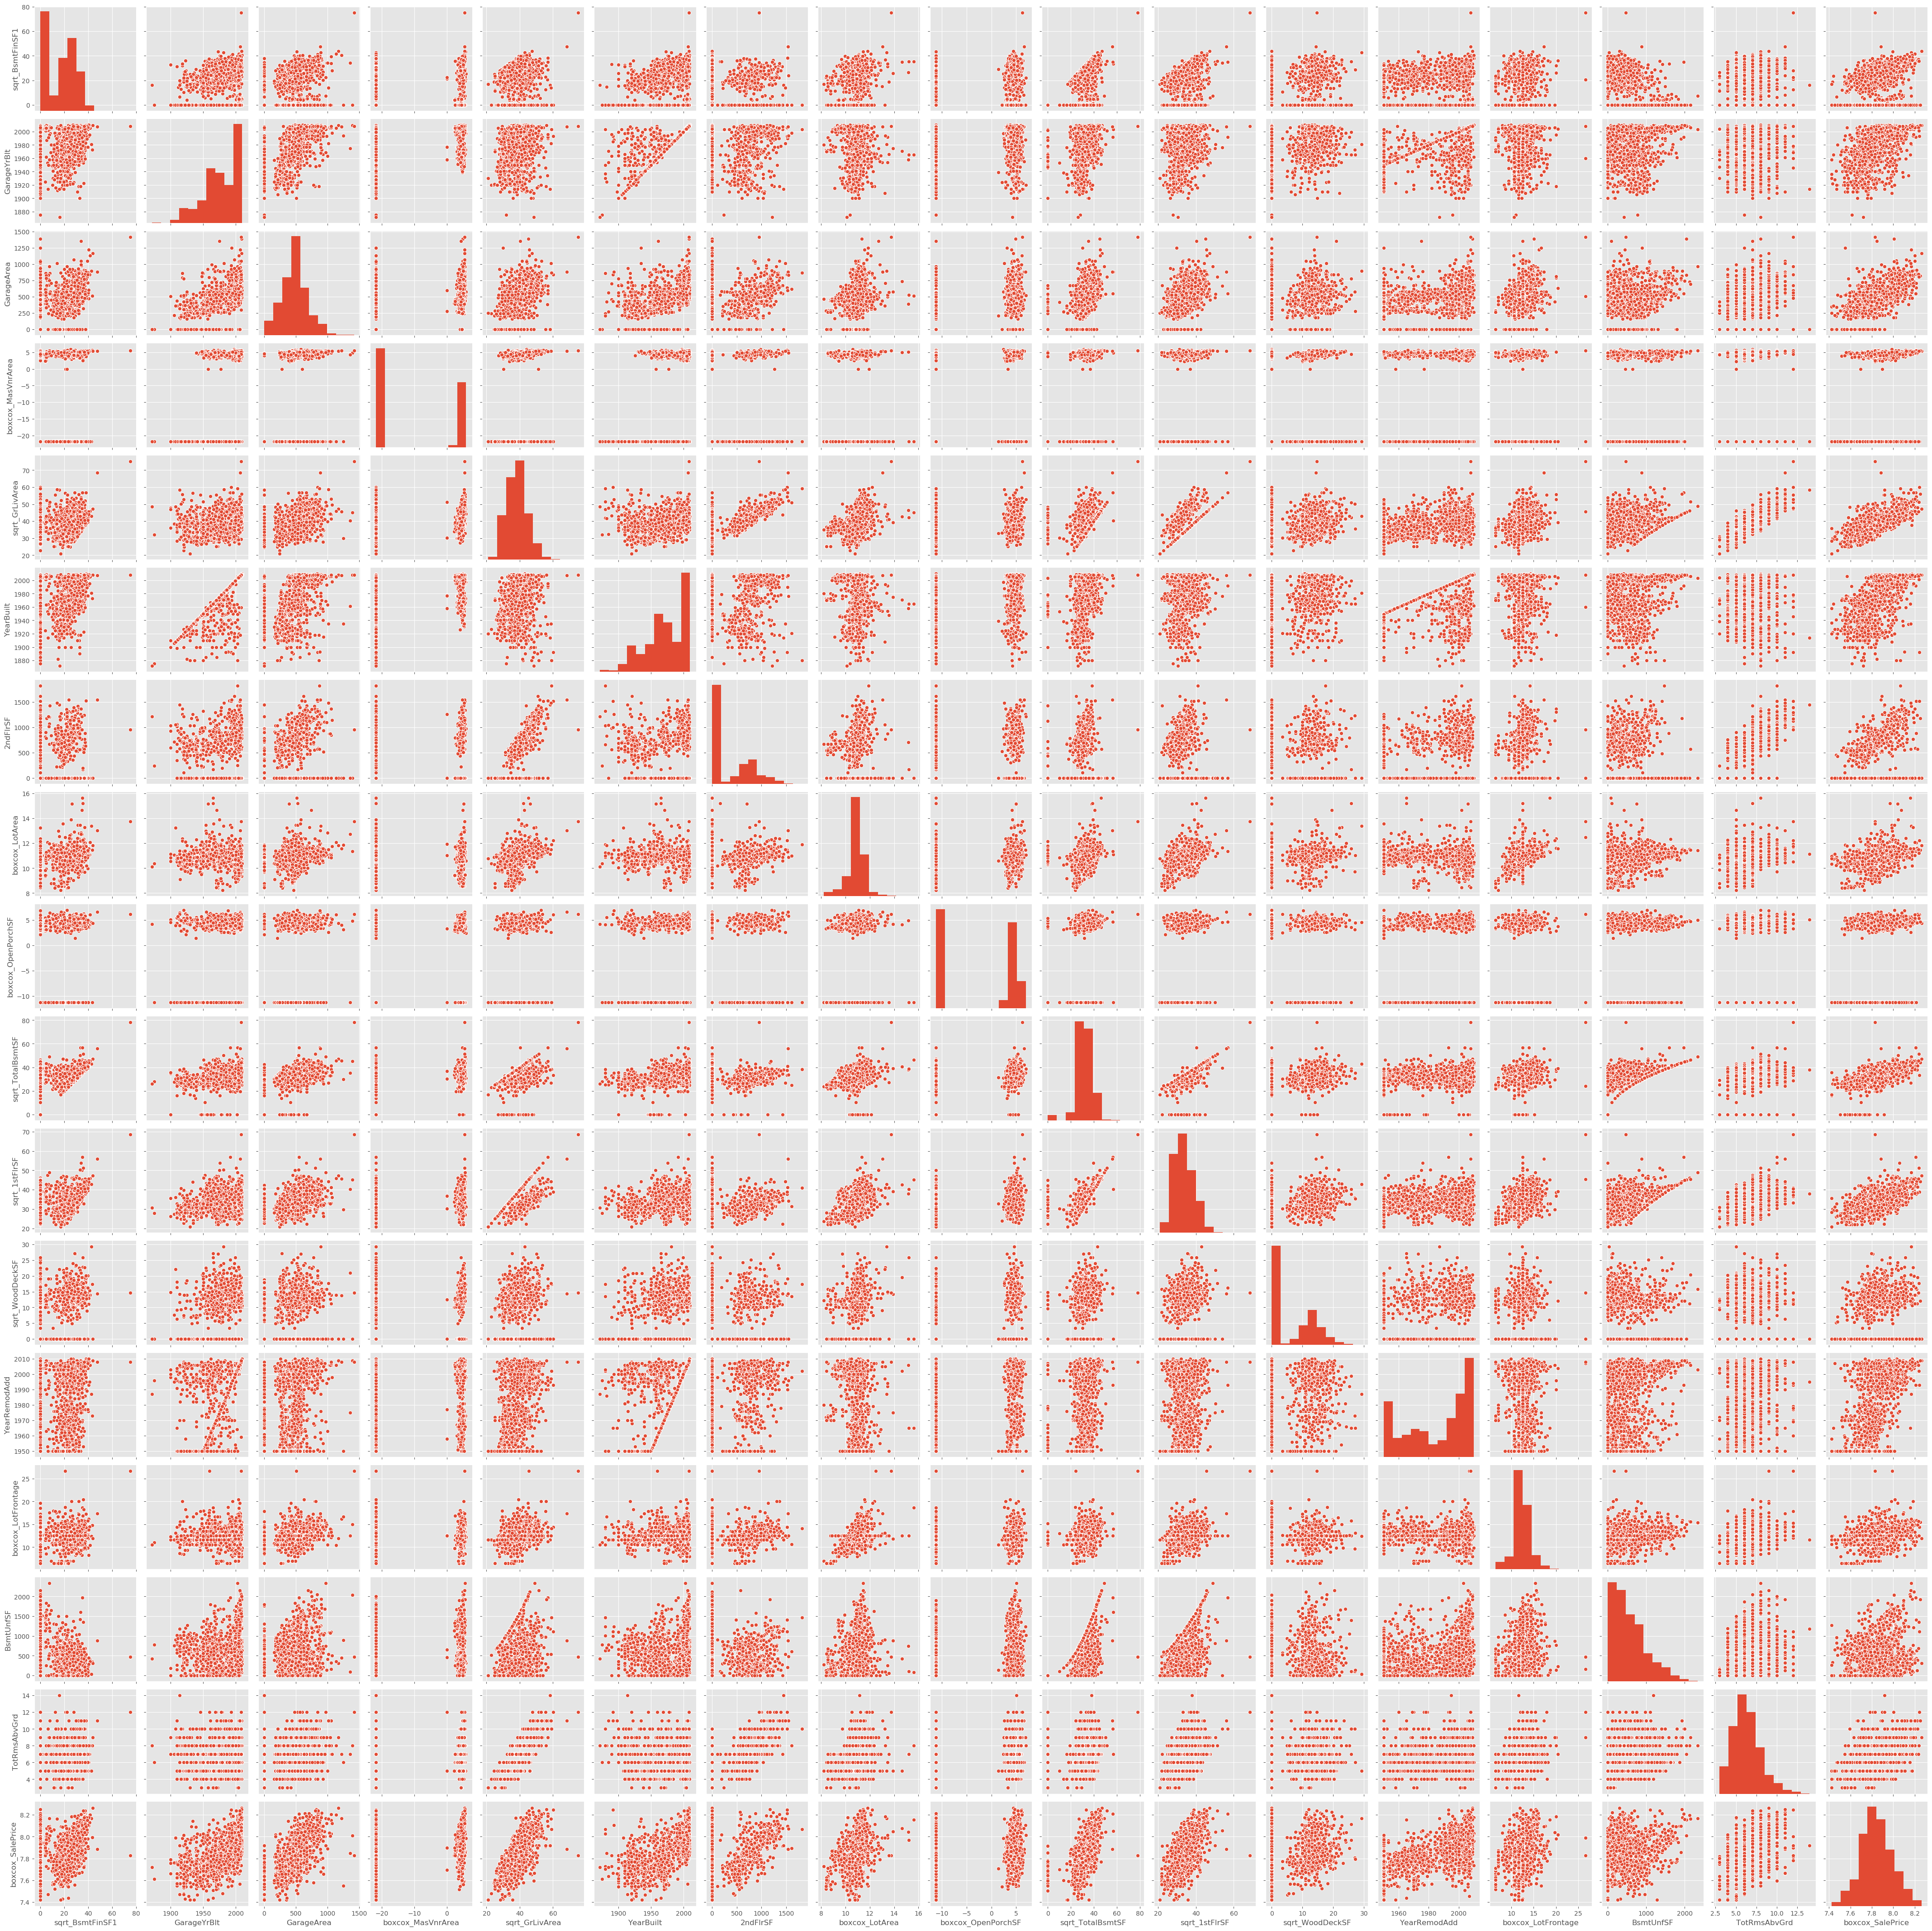

In [112]:
#pair plot
sns.pairplot(cleaned_df[unskew_numerical+["boxcox_SalePrice"]])

Based on above plot, 

- It is observed that some features like OpenPorch, MasVnrArea are not normally distributed even after transformation, so I would use KendallTau and Spearman for both continous varibles and ordinal variables.
- On the hand some feature like sqrt_GrlLivArea, sqrt_1stFlrSF seem to have a linear relationship with 'boxcox_SalePrice'.  

I would like to measure pearson correlation only between target variable and the continous variables to understand the linearity of relationship

##### Correlation with target variable
Since the number of features is many, it would be a better stratedy to eliminate variables which are not correlated with SalePrice first and then check for multi-collinearity

**Pearson Correlation**  

This test is used to measure correlation between 2 continous variables. 
Assumption for this test are:
- Both the columns should be approximately normally distributed.
- Both the columns shouldn't contain outliers.

In [349]:
def pearson_correlation(col):
    # calculate interquartile range
    q25, q75 = np.percentile(cleaned_df[col], 25), np.percentile(cleaned_df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # remove outliers
    x  = list(cleaned_df[col][[lower<=x<=upper for x in cleaned_df[col]]])
    y  = list(cleaned_df['boxcox_SalePrice'][[lower<=x<=upper for x in cleaned_df[col]]])    
    return pearsonr(x,y)
    #return np.corrcoef(x,y)[0][1]

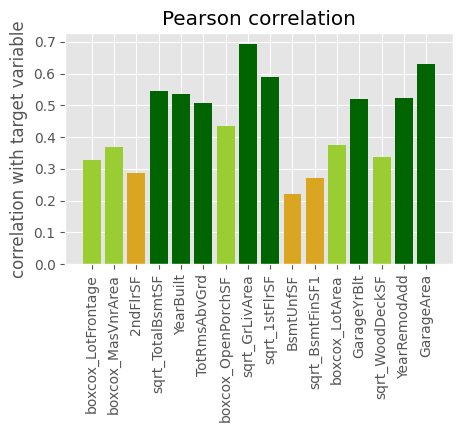

In [350]:
#plotting pearson coefficient
plt.figure(figsize=(5,3))
plt.xticks(rotation=90)
plt.title("Pearson correlation")
plt.ylabel("correlation with target variable")

#if p-value is >0.05 colour the bar differently
colour=[]
for col in unskew_numerical:
    r,p=pearsonr(cleaned_df[col],cleaned_df['SalePrice'])
    if p>0.05:
        colour.append('#FF4500')
    elif r>0.5:
        colour.append('#006400')
    elif r>0.3:
        colour.append('#9ACD32')
    else:
        colour.append('#DAA520')



plt.bar(unskew_numerical, [pearsonr(cleaned_df[col],cleaned_df['SalePrice'])[0] for col in unskew_numerical], width=0.8, color=colour)
plt.show()

Interpreting the above plot:
- Dark Green: Highly correlated
- Light Green: Moderately correlated
- Yellow: Slightly correlated
- Red: p-value>0.05

Since there are no red columns, we can reject the null hypothesis between these variables and target column

**Spearman coefficient**<br>
Spearman coefficient is the non-parametric version of Pearson correlation which can be used for both ordinal and numerical data. It can find any monotonic correlation between the variables unlike pearson which finds only linear correlation.

In [351]:
ordinal_and_numerical=ordinal+numerical

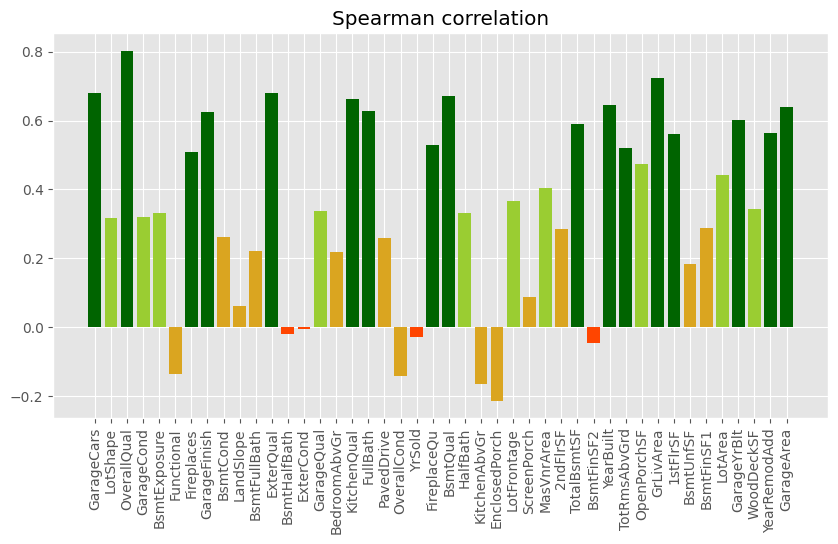

In [352]:
#plotting spearman coefficient
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Spearman correlation")
#if p-value is >0.05 colour the bar differently
#if p-value is >0.05 colour the bar differently
colour=[]
for col in ordinal_and_numerical:
    r,p=spearmanr(cleaned_df[col],cleaned_df['SalePrice'])
    if p>0.05:
        colour.append('#FF4500')
    elif r>0.5:
        colour.append('#006400')
    elif r>0.3:
        colour.append('#9ACD32')
    else:
        colour.append('#DAA520')
        
        
plt.bar(ordinal_and_numerical,[spearmanr(cleaned_df[col],cleaned_df['SalePrice'])[0] for col in ordinal_and_numerical],width=0.8,color=colour)
plt.show()

Interpreting the above plot:
- Dark Green: Highly correlated    
- Light Green: Moderately correlated
- Yellow: Slightly correlated
- Red: p-value>0.05
    
Some comments
- Columns that are red don't show enough correlation, hence we can drop these columns
- It is very much surprising that OverallCond and KitchenAbvGr are negatively correlated. Let's verify this using a different measure.

**Kendall Tau cofficient**<br>
Although Kendall Tau has higher time complexity than spearman, it is still widely used as it can predict results more accurately than spearman for small datasets. 

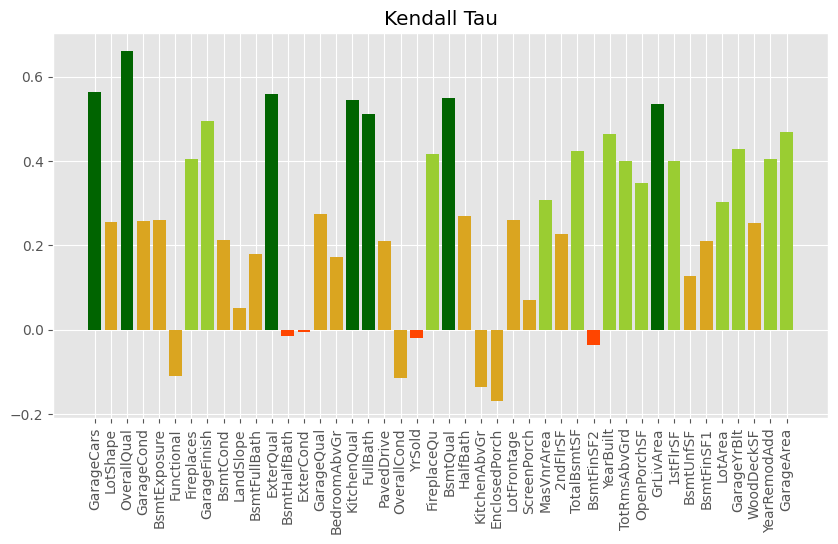

In [353]:
#plotting kendall tau coefficient
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Kendall Tau")
#if p-value is >0.05 colour the bar differently
colour=[]
for col in ordinal_and_numerical:
    r,p=kendalltau(cleaned_df[col],cleaned_df['SalePrice'])
    if p>0.05:
        colour.append('#FF4500')
    elif r>0.5:
        colour.append('#006400')
    elif r>0.3:
        colour.append('#9ACD32')
    else:
        colour.append('#DAA520')
plt.bar(ordinal_and_numerical,[kendalltau(cleaned_df[col],cleaned_df['SalePrice'])[0] for col in ordinal_and_numerical],width=0.8,color=colour)
plt.show()

Indeed OverallCond and KitchenAbvGr has a negative correlation.  
(Just For Fun :): 
- Maybe be people are biased to rate low when they have to pay more.
- Why to go for more kitchens? One kitchen is more than sufficient I guess so.

**One Way ANOVA test**<br>
This test is used to measure association between an independent categorical and a continous dependent variable. 


In [354]:
def f_scores(col):
    values=set(cleaned_df[col])
    arr=tuple( [cleaned_df['boxcox_SalePrice'][cleaned_df[col]==value] for value in values])
    F, p = stats.f_oneway(*arr)
    #calculating critical F-value
    a=len(values)
    n=len(cleaned_df[col])
    crit_f=scipy.stats.f.ppf(q=0.95, dfn=a-1, dfd=n-a)     
    return (F, F>crit_f, p)

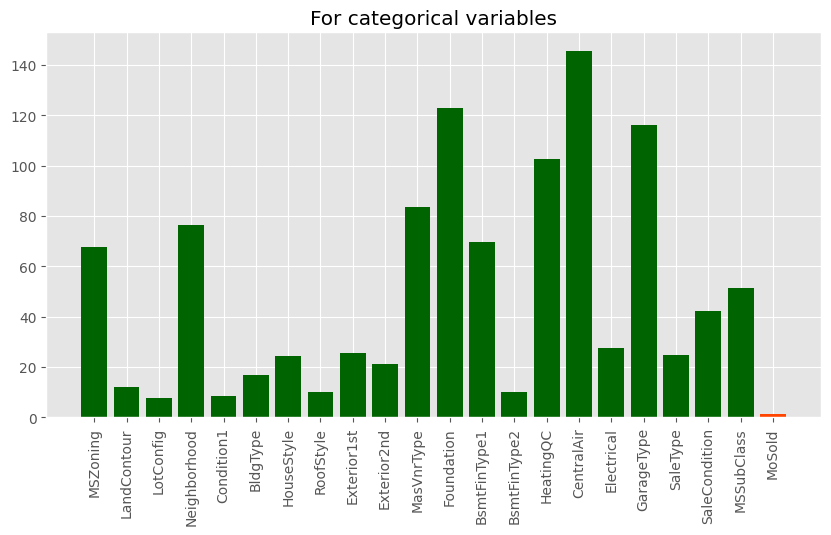

In [355]:
#ANOVA
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("For categorical variables")
colour=[]
for col in categorical:
    f,crit,p=f_scores(col)
    if p>0.05:
        colour.append('#FF4500')
    elif crit:
        colour.append('#006400')    
    else:
        colour.append('#DAA520')
plt.bar(categorical, [f_scores(col)[0] for col in categorical], width=0.8, color=colour)
plt.show()

Interpreting the above plot:
- Dark Green: Highly correlated  
- Yellow: f score < critical f value
- Red: p-value>0.05

Some observations:
- p value for MoSold is 0.2, we can drop the column as it's f-score is very less.

Based on above correlation analysis, following was done to filter out the columns:
- All the highly correlated columns(columns in dark green) in pearson, spearman, and kendall tau were picked.
- Top 10 Categorical variables were picked along with Electrical and MasVnrType.

In [356]:
#Based on above correlation following columns have been filtered
numerical_filtered=['YearBuilt','TotRmsAbvGrd','sqrt_GrLivArea','sqrt_1stFlrSF','GarageYrBlt','YearRemodAdd','GarageArea']
ordinal_filtered=['GarageCars','OverallQual','Fireplaces','GarageFinish','BsmtFullBath','KitchenQual','FullBath','FireplaceQu','BsmtQual','TotalBsmtSF']
categorical_filtered=['MSZoning', 'Neighborhood', 'Foundation', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'GarageType', 'SaleCondition', 'MSSubClass', 'MasVnrType']

#### Choosing a single column that best describes the 'SalePrice'

##### Naive approach: Simple Linear Regression

In this section SalesPrice will be trained and tested using single column.: <br>
To train the models with a single column as independent variable, following will be used:
1. Numerical: Linear Regression
2. Ordinal: Theil-Sen regression (A non parametric version of linear regression to be used here, which is also robust to outliers)
3. Categorical: Linear Regression after one-hot encoding  
<br>  

**Linear Regression**

In [357]:
#splitting into train and validation datasets
X=numerical_filtered
y=['boxcox_SalePrice']
X_train, X_test, y_train, y_test = train_test_split(cleaned_df[X],cleaned_df[y], test_size=0.4, random_state=1)

In [358]:
for col in numerical_filtered:
    reg = linear_model.LinearRegression()
    # train the model using the training sets
    reg.fit(X_train[[col]], y_train['boxcox_SalePrice'])
    y_pred=reg.predict(X_test[[col]])
    print(col)
    print('Mean squared error: %.2f' % mean_squared_error(y_test['boxcox_SalePrice'], y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'% r2_score(y_test['boxcox_SalePrice'], y_pred))
    print("-----------------------------------------------------")

YearBuilt
Mean squared error: 0.01
Coefficient of determination: 0.36
-----------------------------------------------------
TotRmsAbvGrd
Mean squared error: 0.02
Coefficient of determination: 0.25
-----------------------------------------------------
sqrt_GrLivArea
Mean squared error: 0.01
Coefficient of determination: 0.48
-----------------------------------------------------
sqrt_1stFlrSF
Mean squared error: 0.01
Coefficient of determination: 0.37
-----------------------------------------------------
GarageYrBlt
Mean squared error: 0.01
Coefficient of determination: 0.35
-----------------------------------------------------
YearRemodAdd
Mean squared error: 0.01
Coefficient of determination: 0.34
-----------------------------------------------------
GarageArea
Mean squared error: 0.01
Coefficient of determination: 0.44
-----------------------------------------------------


**TheilSenRegressor**

In [359]:
#splitting into train and validation datasets
X=ordinal_filtered
y=['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(cleaned_df[X],cleaned_df[y], test_size=0.4, random_state=1)

In [360]:
for col in ordinal_filtered:
    model=TheilSenRegressor(random_state=42)
    model.fit(X_train[[col]], y_train['SalePrice'])    
    y_pred = model.predict(X_test[[col]])
    print(col)
    print('Mean squared error: %.2f' % mean_squared_error(y_test['SalePrice'], y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'% r2_score(y_test['SalePrice'], y_pred))
    print("-----------------------------------------------------")

GarageCars
Mean squared error: 3227611664.38
Coefficient of determination: 0.42
-----------------------------------------------------
OverallQual
Mean squared error: 2536873229.60
Coefficient of determination: 0.54
-----------------------------------------------------
Fireplaces
Mean squared error: 4989984297.59
Coefficient of determination: 0.10
-----------------------------------------------------
GarageFinish
Mean squared error: 4016330467.44
Coefficient of determination: 0.27
-----------------------------------------------------
BsmtFullBath
Mean squared error: 5868548298.01
Coefficient of determination: -0.06
-----------------------------------------------------
KitchenQual
Mean squared error: 3521241431.08
Coefficient of determination: 0.36
-----------------------------------------------------
FullBath
Mean squared error: 4096105646.72
Coefficient of determination: 0.26
-----------------------------------------------------
FireplaceQu
Mean squared error: 4912345101.88
Coefficient

**Linear Regression with one hot encoding**

In [361]:
X_cat=categorical_filtered
one_hot_encoder = ce.OneHotEncoder(use_cat_names=True)
X_encoded=one_hot_encoder.fit_transform(cleaned_df[X_cat])

In [362]:
#splitting into train and validation datasets
X=categorical_filtered
y=['boxcox_SalePrice']
X_encoded_train, X_encoded_test, y_train, y_test = train_test_split(X_encoded,cleaned_df[y], test_size=0.4, random_state=1)

In [363]:
#Linear regression
reg = linear_model.LinearRegression()
for col in X_cat:
    print("--------------------------------------------------------")
    print(col)
    values=set(cleaned_df[col])
    value=list(values)[0]    
    if isinstance(value, str):
        features=[col+'_'+value for value in values]
    else:
        features=[col]
    # train the model using the training sets
    reg.fit(X_encoded_train[features], y_train['boxcox_SalePrice'])
    y_pred=reg.predict(X_encoded_test[features])
    print('Mean squared error: %.2f' % mean_squared_error(y_test['boxcox_SalePrice'], y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'% r2_score(y_test['boxcox_SalePrice'], y_pred))

--------------------------------------------------------
MSZoning
Mean squared error: 0.02
Coefficient of determination: 0.14
--------------------------------------------------------
Neighborhood
Mean squared error: 0.01
Coefficient of determination: 0.54
--------------------------------------------------------
Foundation
Mean squared error: 0.02
Coefficient of determination: 0.29
--------------------------------------------------------
BsmtFinType1
Mean squared error: 0.02
Coefficient of determination: 0.25
--------------------------------------------------------
HeatingQC
Mean squared error: 0.02
Coefficient of determination: 0.23
--------------------------------------------------------
CentralAir
Mean squared error: 0.02
Coefficient of determination: 0.09
--------------------------------------------------------
GarageType
Mean squared error: 0.02
Coefficient of determination: 0.32
--------------------------------------------------------
SaleCondition
Mean squared error: 0.02
Coeffic

Some of the columns which can best predict 'SalePrice' based on above analysis is
- GrLivArea: CoD=0.48
- OverallQual: CoD=0.54
- Neighbourhood: CoD=0.54  

(CoD->Coefficient of determination)

##### Feature selection using mutual_info_regression

In [364]:
from sklearn.feature_selection import mutual_info_regression

In [365]:
#Label encoding
temp_df=cleaned_df.copy(deep=True)
temp_df=temp_df[numerical_filtered+ordinal_filtered+categorical_filtered+['SalePrice','boxcox_SalePrice']]

for col in categorical_filtered:
    temp_df[col] = LabelEncoder().fit_transform(temp_df[col])
    
X=temp_df.drop(['SalePrice','boxcox_SalePrice'],axis=1)

y=temp_df['SalePrice']


Text(0.5, 1.0, 'Top 10 Multivariate Features using Mutual Information Regression')

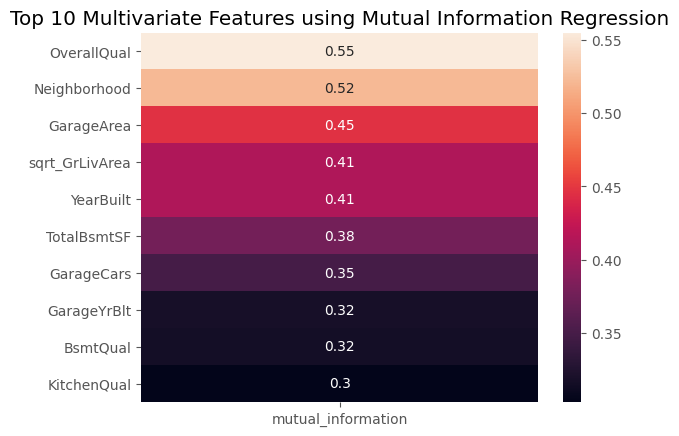

In [366]:
reg = mutual_info_regression(X, y, discrete_features = True, n_neighbors=5, copy=True, random_state=None)

reg_df = pd.DataFrame(reg, index=X.columns, columns=['mutual_information'])
reg_best10 = reg_df.sort_values(by = 'mutual_information', ascending=False).head(10)
sns.heatmap(data = reg_best10, annot=True )
plt.title('Top 10 Multivariate Features using Mutual Information Regression')

**OverallQual** was found to be the best predictor in both naive analysis using Linear Regression and mutual_info_regression.
Hence based on above result column that best describes "SalePrice" is **OverallQual**.

##### Correlation with independent variables

**Phi K correlation**

To perform correlation, phi_k correlation coefficient will be used, since
- it can work consistently between categorical, ordinal and interval variables
- it can capture non-linear dependency
- it reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution

In [367]:
import phik

from phik import resources
from phik.binning import bin_data
from phik.decorators import *
from phik.report import plot_correlation_matrix

In [368]:

filtered_df=cleaned_df[numerical_filtered+ordinal_filtered+categorical_filtered+['boxcox_SalePrice']]

<function matplotlib.pyplot.show(close=None, block=None)>

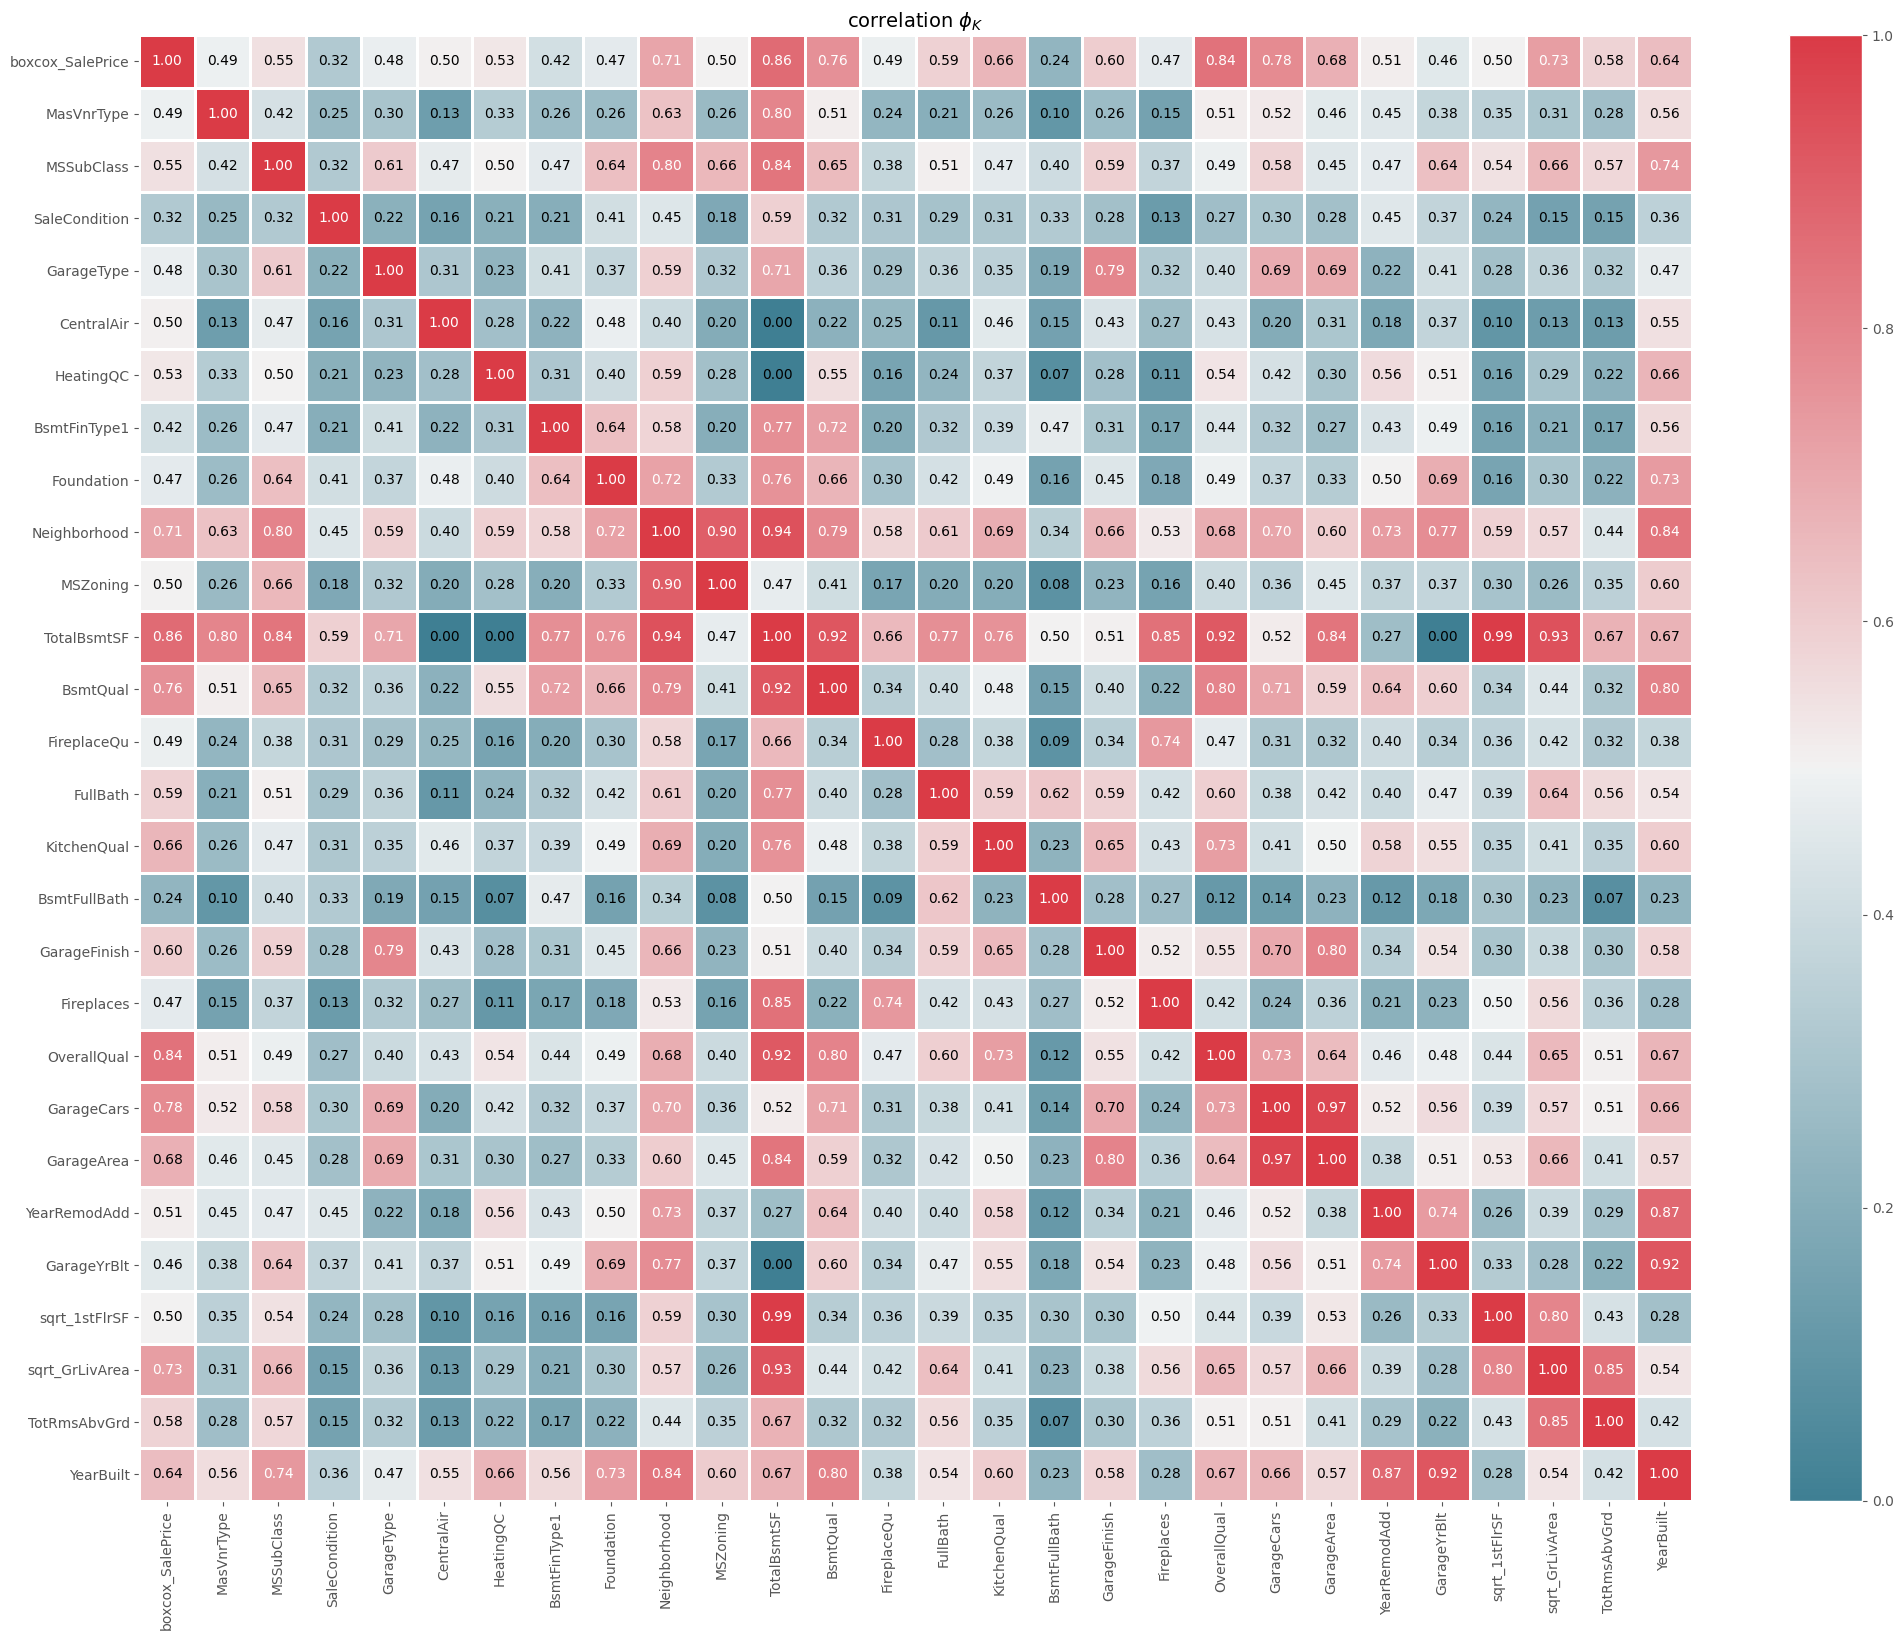

In [369]:
# get the phi_k correlation matrix between all variables
coerr_mat=filtered_df.phik_matrix(interval_cols=numerical_filtered+['boxcox_SalePrice'])

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plot_correlation_matrix(coerr_mat.values, x_labels=coerr_mat.columns, y_labels=coerr_mat.index, 
                        vmin=0, vmax=1, color_map=cmap, title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(7*3,5.5*3))
plt.tight_layout()
plt.show

In [370]:

class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        for i in list(G.nodes()):
            G.nodes[i]['corr_target']=coerr_mat['boxcox_SalePrice'][i]        
        node_color = [20 * nx.get_node_attributes(G, 'corr_target')[v] for v in G]
        nx.draw_shell(G, node_color = node_color, alpha = 0.7, with_labels = True, edge_color ='.4', cmap = cmap, font_size=6 )
        plt.title("correlation vizualization as graph")
        plt.style.use('ggplot')
        plt.figure(figsize=(5,3))
        plt.show()

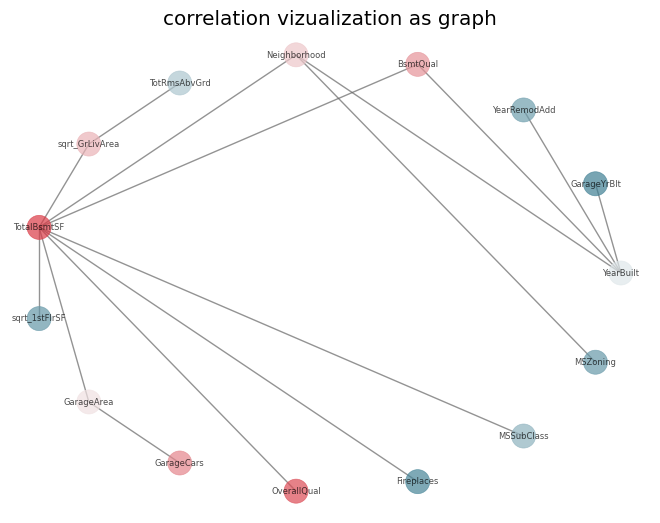

<Figure size 500x300 with 0 Axes>

In [371]:
G = GraphVisualization()
for col1 in filtered_df.columns:
    for col2 in filtered_df.columns:
        if col1!=col2 and col1!='boxcox_SalePrice' and col2 != 'boxcox_SalePrice':
            if coerr_mat[col1][col2]>0.8:
                G.addEdge(col1,col2) 



G.visualize()
    

Above Graph plot is to be interpreted as follows:
- intensity of the node represents it's correlation with target variable. (Red node has more correlation with Saleprice and blue node has less correlation with SalePrice)
- Connected nodes have phi_k correlation greater than 0.8

#### Train a regression model predicting SalePrice for the other fields in dataset.csv


Based on above correlation we see that data is multicollinear. For example columns like TotalBsmtSF and OverallQual are highly correlated with each other as well as the SalePrice. Hence it becomes difficult to decide which columns to drop. 


- **Lasso regression** seems like an appropriate model based on the above description. Apart from handling multicollinearity, it can also avoid overfitting by penalizing the coefficients. 
- Ridge regression is also similar to lasso, but even after selecting best features, it doesn't remove them from the model. Hence I would prefer lasso over ridge.

As a naive approach, I would pass all the features and see which feature Lasso regression chooses.

In [15]:
class PreProcessor:
    def __init__(self):
        #treating certain categorical columns as ordinal
        self.encoder={}
        self.encoder['LotShape']={'Reg':0,'IR1':1,'IR2':2,'IR3':3}
        self.encoder['LandSlope']={'Gtl':1, 'Mod':2, 'Sev':3}
        self.encoder['GarageFinish']={'Fin':3, 'RFn':2, 'Unf':1, 'VNA':0}
        self.encoder['BsmtExposure']={'Gd':4,'Av':3,'Mn':2,'No':1,'VNA':0}
        self.encoder['Functional']={'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7}
        self.encoder['PavedDrive']={'Y':2,'P':1,'N':0}
        #columns with values as Ex,Gd,TA,Fa,Po,VNA can be treated as ordinal
        ratings={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'VNA':0}
        rated_cols=['ExterQual', 'ExterCond','BsmtQual','BsmtCond','KitchenQual','FireplaceQu','GarageQual', 'GarageCond']
        for col in rated_cols:
            self.encoder[col]=ratings
        self.categorical_encoded=self.encoder.keys()
        
        
        
    def preprocessing1(self,df):
        #drop columns with mostly one value or mostly missing values
        dropped_cols=['Street', 'Alley', 'Utilities', 'Condition2', 'RoofMatl', 'Heating','LowQualFinSF', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']
        df.drop(dropped_cols, axis=1, inplace=True)
        
        #treating missing values
        #Filling missing values with median
        col1=['LotFrontage','MasVnrArea']
        for col in col1:
            df[col].fillna(df[col].median(), inplace=True)
        #Fill missing values with new category "VNA"
        col2=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu','MasVnrType',  'Electrical']
        for col in col2:
            df[col].fillna('VNA', inplace=True)
            
        #Replacing Na values in GarageYrBlt with corresponding values in YearBuilt
        df.loc[(pd.isnull(df.GarageYrBlt)), 'GarageYrBlt'] = df.YearBuilt
            
        #encoding categorical columns to ordinal 
        for col in self.categorical_encoded:
            df[col]=df[col].apply(lambda val: self.encoder[col][val])
            
        #apply lable encoder
        for col in df.select_dtypes(include=['object']).columns:
            df[col] = LabelEncoder().fit_transform(df[col])
            
        return df
    
    def preprocessing2(self,df):
        df=self.preprocessing1(df)
        
        #filtered columns
        numerical_filtered=['YearBuilt','TotRmsAbvGrd','GrLivArea','1stFlrSF','GarageYrBlt','YearRemodAdd','GarageArea']
        ordinal_filtered=['GarageCars','OverallQual','Fireplaces','GarageFinish','BsmtFullBath','KitchenQual','FullBath','FireplaceQu','BsmtQual','TotalBsmtSF']
        categorical_filtered=['MSZoning', 'Neighborhood', 'Foundation', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'GarageType', 'SaleCondition', 'MSSubClass', 'MasVnrType']
        
        return df[numerical_filtered+ordinal_filtered+categorical_filtered]
        
            
        
        
        
        

In [16]:
def adj_r2_score(model,X, y):
    adj = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    return adj

In [20]:
# split into train and test sets

pp=PreProcessor()
X=df[df.columns[:-1]]
y=df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train=pp.preprocessing1(X_train)
X_test=pp.preprocessing1(X_test)


In [21]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
adjusted_train_score=adj_r2_score(lasso,X_train,y_train)
adjusted_test_score=adj_r2_score(lasso,X_test,y_test)

print ("training score-R2:", train_score )
print ("test score-R2: ", test_score)
print ("training score-adjustedR2:", adjusted_train_score )
print ("test score-adjustedR2: ", adjusted_test_score)


training score-R2: 0.8361475955433888
test score-R2:  0.8452404411145876
training score-adjustedR2: 0.8256278886424779
test score-adjustedR2:  0.8109648341131205


**Lasso model using only the correlated features**

In [24]:
# split into train and test sets

pp=PreProcessor()
X=df[df.columns[:-1]]
y=df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train=pp.preprocessing2(X_train)
X_test=pp.preprocessing2(X_test)

In [25]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
adjusted_train_score=adj_r2_score(lasso,X_train,y_train)
adjusted_test_score=adj_r2_score(lasso,X_test,y_test)

print ("training score-R2:", train_score )
print ("test score-R2: ", test_score)
print ("training score-adjustedR2:", adjusted_train_score )
print ("test score-adjustedR2: ", adjusted_test_score)



training score-R2: 0.8031975743074516
test score-R2:  0.817122270833588
training score-adjustedR2: 0.798217569158718
test score-adjustedR2:  0.8024703459448843


If we compare R2 score we might observe that R2 score for naive model is slightly better, that is because R2 score always increases with number of features. This can be accounted using adjusted R2, which would result in similar values between when many features used and when only correlated features are used.

Also the training accuracy is close to the test accuracy which suggests that model is not overfitting. That means lasso regression is good at taking care of overfitting.

**Subset on which better prediction can be made**

In order to find a subset on which better prediction can be made, forward subset selction algorithm will be implemented, which builds upon the previous subset by adding best new feature to it. I'll be using adjusted R^2 score based on lasso regression to find the best possible subset.

In [34]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = Lasso()
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [35]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook
import itertools

#Initialization variables
Y = df['SalePrice']
X = df.drop(['SalePrice'], axis = 1)
X=pp.preprocessing2(X)
k = 25

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [36]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['OverallQual'], 3446964183252.0),
 (2, ['OverallQual', 'GrLivArea'], 2631867616747.0),
 (3, ['OverallQual', 'GrLivArea', 'TotalBsmtSF'], 2375024527879.0),
 (4,
  ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'KitchenQual'],
  2184015873187.0)]

In [37]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [38]:
#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

features           RSS  \
1                                       [OverallQual]  3.446964e+12   
2                            [OverallQual, GrLivArea]  2.631868e+12   
3               [OverallQual, GrLivArea, TotalBsmtSF]  2.375025e+12   
4   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  2.184016e+12   
5   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  2.063310e+12   
6   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.991544e+12   
7   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.925113e+12   
8   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.886132e+12   
9   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.857837e+12   
10  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.836155e+12   
11  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.818887e+12   
12  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.809025e+12   
13  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.799743e+12   
14  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.792145e+12   
15  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.785154e+12   
16  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.779799e+12   
17  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.775089e+12   
18  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.771654e+12   
19  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.768124e+12   
20  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.765859e+12   
21  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.763835e+12   
22  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.762079e+12   
23  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.761603e+12   
24  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.761347e+12   
25  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.761189e+12   

    R_squared  numb_features  R_squared_adj  
1    0.625652              1       0.625395  
2    0.714173              2       0.713781  
3    0.742067              3       0.741536  
4    0.762811              4       0.762159  
5    0.775920              5       0.775149  
6    0.783714              6       0.782821  
7    0.790928              7       0.789920  
8    0.795162              8       0.794032  
9    0.798235              9       0.796982  
10   0.800589             10       0.799213  
11   0.802465             11       0.800964  
12   0.803536             12       0.801907  
13   0.804544             13       0.802787  
14   0.805369             14       0.803483  
15   0.806128             15       0.804114  
16   0.806710             16       0.804567  
17   0.807221             17       0.804949  
18   0.807594             18       0.805191  
19   0.807978             19       0.805444  
20   0.808224             20       0.805558  
21   0.808443             21       0.805646  
22   0.808634             22       0.805705  
23   0.808686             23       0.805622  
24   0.808714             24       0.805515  
25   0.808731             25       0.805396

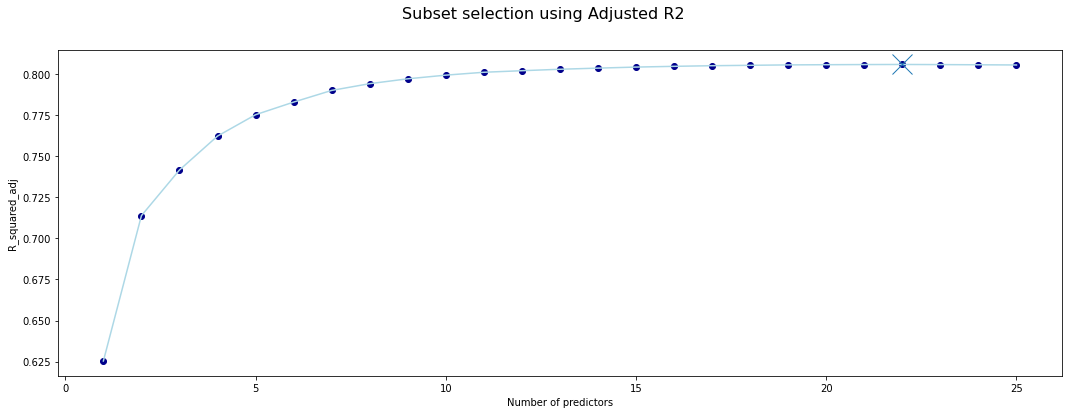

In [44]:
#subset selection using adjusted R-square

fig = plt.figure(figsize = (18,6))


v='R_squared_adj'
plt.plot(df1['numb_features'],df1[v], color = 'lightblue')
plt.scatter(df1['numb_features'],df1[v], color = 'darkblue')
plt.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)

plt.xlabel('Number of predictors')
plt.ylabel(v)

fig.suptitle('Subset selection using Adjusted R2', fontsize = 16)
plt.show()

- We can observe that model almost saturates after 10 predictors.
- Best subset set was found when number of features=22


In [50]:
df1.sort_values('R_squared_adj',ascending=False)

features           RSS  \
22  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.762079e+12   
21  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.763835e+12   
23  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.761603e+12   
20  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.765859e+12   
24  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.761347e+12   
19  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.768124e+12   
25  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.761189e+12   
18  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.771654e+12   
17  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.775089e+12   
16  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.779799e+12   
15  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.785154e+12   
14  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.792145e+12   
13  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.799743e+12   
12  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.809025e+12   
11  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.818887e+12   
10  [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.836155e+12   
9   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.857837e+12   
8   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.886132e+12   
7   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.925113e+12   
6   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  1.991544e+12   
5   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  2.063310e+12   
4   [OverallQual, GrLivArea, TotalBsmtSF, KitchenQ...  2.184016e+12   
3               [OverallQual, GrLivArea, TotalBsmtSF]  2.375025e+12   
2                            [OverallQual, GrLivArea]  2.631868e+12   
1                                       [OverallQual]  3.446964e+12   

    R_squared  numb_features  R_squared_adj  
22   0.808634             22       0.805705  
21   0.808443             21       0.805646  
23   0.808686             23       0.805622  
20   0.808224             20       0.805558  
24   0.808714             24       0.805515  
19   0.807978             19       0.805444  
25   0.808731             25       0.805396  
18   0.807594             18       0.805191  
17   0.807221             17       0.804949  
16   0.806710             16       0.804567  
15   0.806128             15       0.804114  
14   0.805369             14       0.803483  
13   0.804544             13       0.802787  
12   0.803536             12       0.801907  
11   0.802465             11       0.800964  
10   0.800589             10       0.799213  
9    0.798235              9       0.796982  
8    0.795162              8       0.794032  
7    0.790928              7       0.789920  
6    0.783714              6       0.782821  
5    0.775920              5       0.775149  
4    0.762811              4       0.762159  
3    0.742067              3       0.741536  
2    0.714173              2       0.713781  
1    0.625652              1       0.625395